In [17]:
import numpy as np
from itertools import chain
import matplotlib
import pickle
import heapq as hq
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree
import time
import helper
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 8)

## Defining the environment as provided in the question

In [18]:
def mapl(f, *seq):
    return list(map(f, *seq))

def random_point(xmin=0, xmax=801, ymin=0, ymax=301, tint=5):
    rx = np.random.randint(xmin, xmax)
    ry = np.random.randint(ymin, ymax)
    rtheta = np.random.choice(list(range(0, 91, tint)))
    
    return (rx, ry, rtheta)

def plot_polygons(env, path=None, scatter_points=None):
    # This very is similar to
    # https://stackoverflow.com/questions/26935701/ploting-filled-polygons-in-python
    fig, ax = plt.subplots()
    patches = helper.mapl(lambda poly: poly.to_patches_polygon(), env)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.9)
    colors = 100*np.random.rand(len(patches))
    p.set_array(np.array(colors))


    major_ticks_x = np.arange(0, 801, 25)
    major_ticks_y = np.arange(0, 301, 25)
    plt.gca().invert_yaxis()
    ax.add_collection(p)
    ax.set_xticks(major_ticks_x)
    ax.set_yticks(major_ticks_y)    
    ax.xaxis.tick_top()
    
    if path is not None:
        plt.plot(path[:, 0], path[:, 1], c='red', label='Shortest Path')
    if scatter_points is not None:
        plt.scatter(scatter_points[:, 0], scatter_points[:, 1], label='Nodes')
    
    if path is not None or scatter_points is not None:
        plt.legend()
    plt.show()

In [19]:
#Configuration space class is defined in config_space.ipynb file

# The parameters of gen_room function are ([x,y], width, height)
# x, y are the co ordinates, width is the width and height is the height of the rectangle.
# Height = 1 or width = 1 for a line
top = helper.Rectangle([0, 0], 800, 1)
bottom = helper.Rectangle([0, 299], 800, 1)
left = helper.Rectangle([0, 0], 1, 300)
right = helper.Rectangle([799, 0], 1, 300)
wall_1 = helper.Rectangle([200, 0], 1, 200)
wall_2 = helper.Rectangle([100, 199], 200, 1)
wall_3 = helper.Rectangle([400, 100], 1, 200)
wall_4 = helper.Rectangle([600, 0], 1, 200)
wall_5 = helper.Rectangle([500, 199], 200, 1)

#Plot the environment
env = helper.Environment([top, bottom, left, right, 
                      wall_1, wall_2, wall_3, wall_4, wall_5])

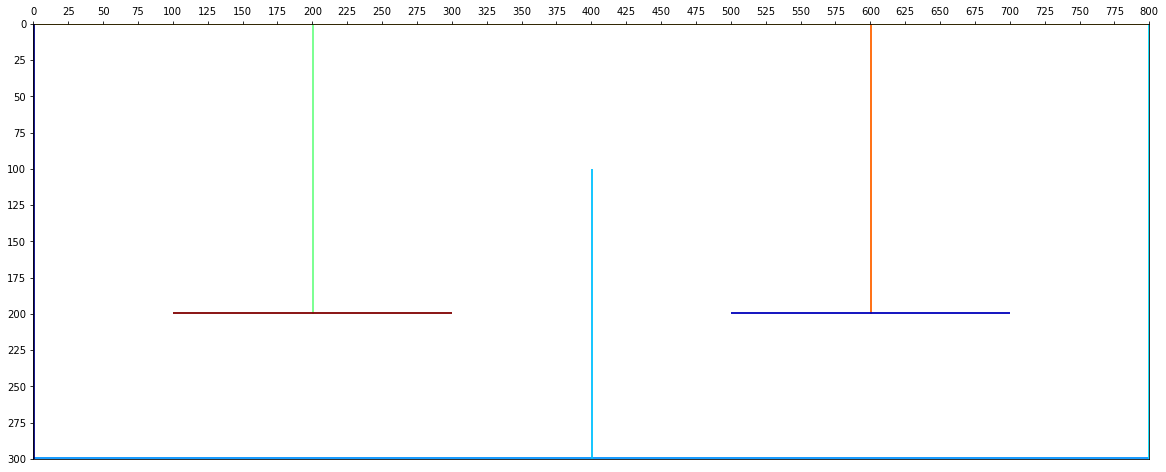

In [24]:
plot_polygons(env)

In [21]:
robot = helper.ReferenceRectangle([25, 25], 50, 50, 0)
augmented_env = helper.Environment(mapl(lambda poly: robot + poly, env))

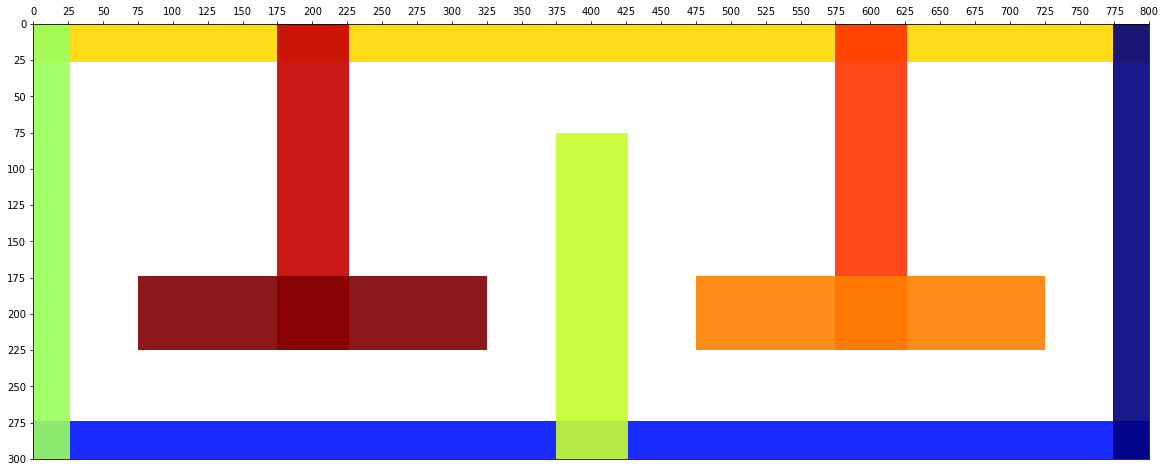

In [22]:
plot_polygons(augmented_env)